In [100]:
from pathlib import Path
desktop_path = Path.home() / "Desktop"
import sys # https://stackoverflow.com/questions/4383571/importing-files-from-different-folder
sys.path.insert(1, rf'{desktop_path}\RA\penicilin\Libaries')

In [102]:
from reload_lib import reload_lib
import main as m
import results_figures as rfig
import sensitivity as st
import sensitvity_countries as stc
import monte_carlo_energy as mce
import mid_to_endpoint_contribution as mte

In [103]:
reload_lib(m)
init = m.main()

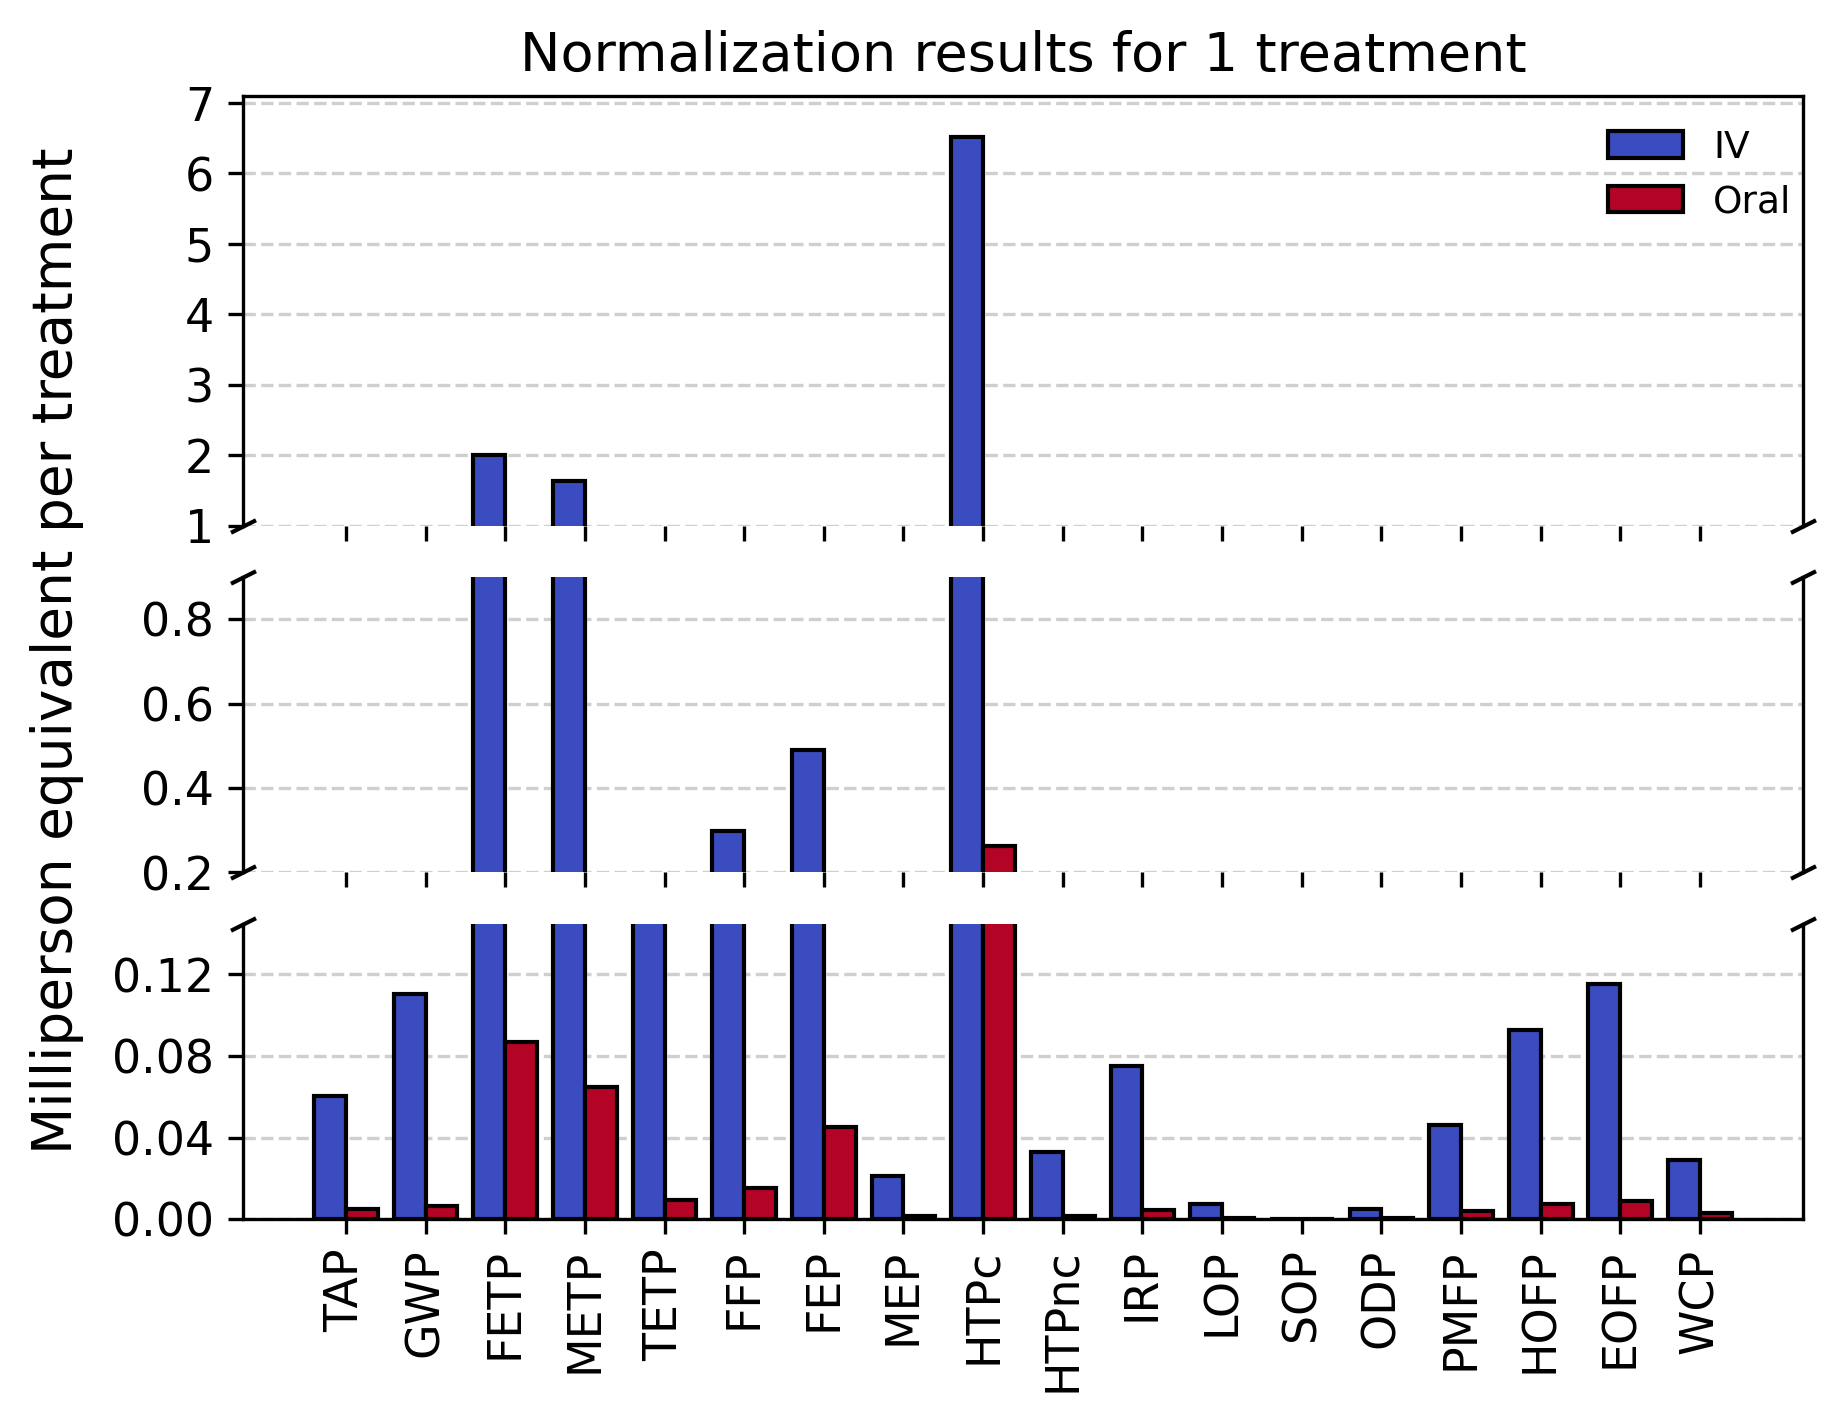

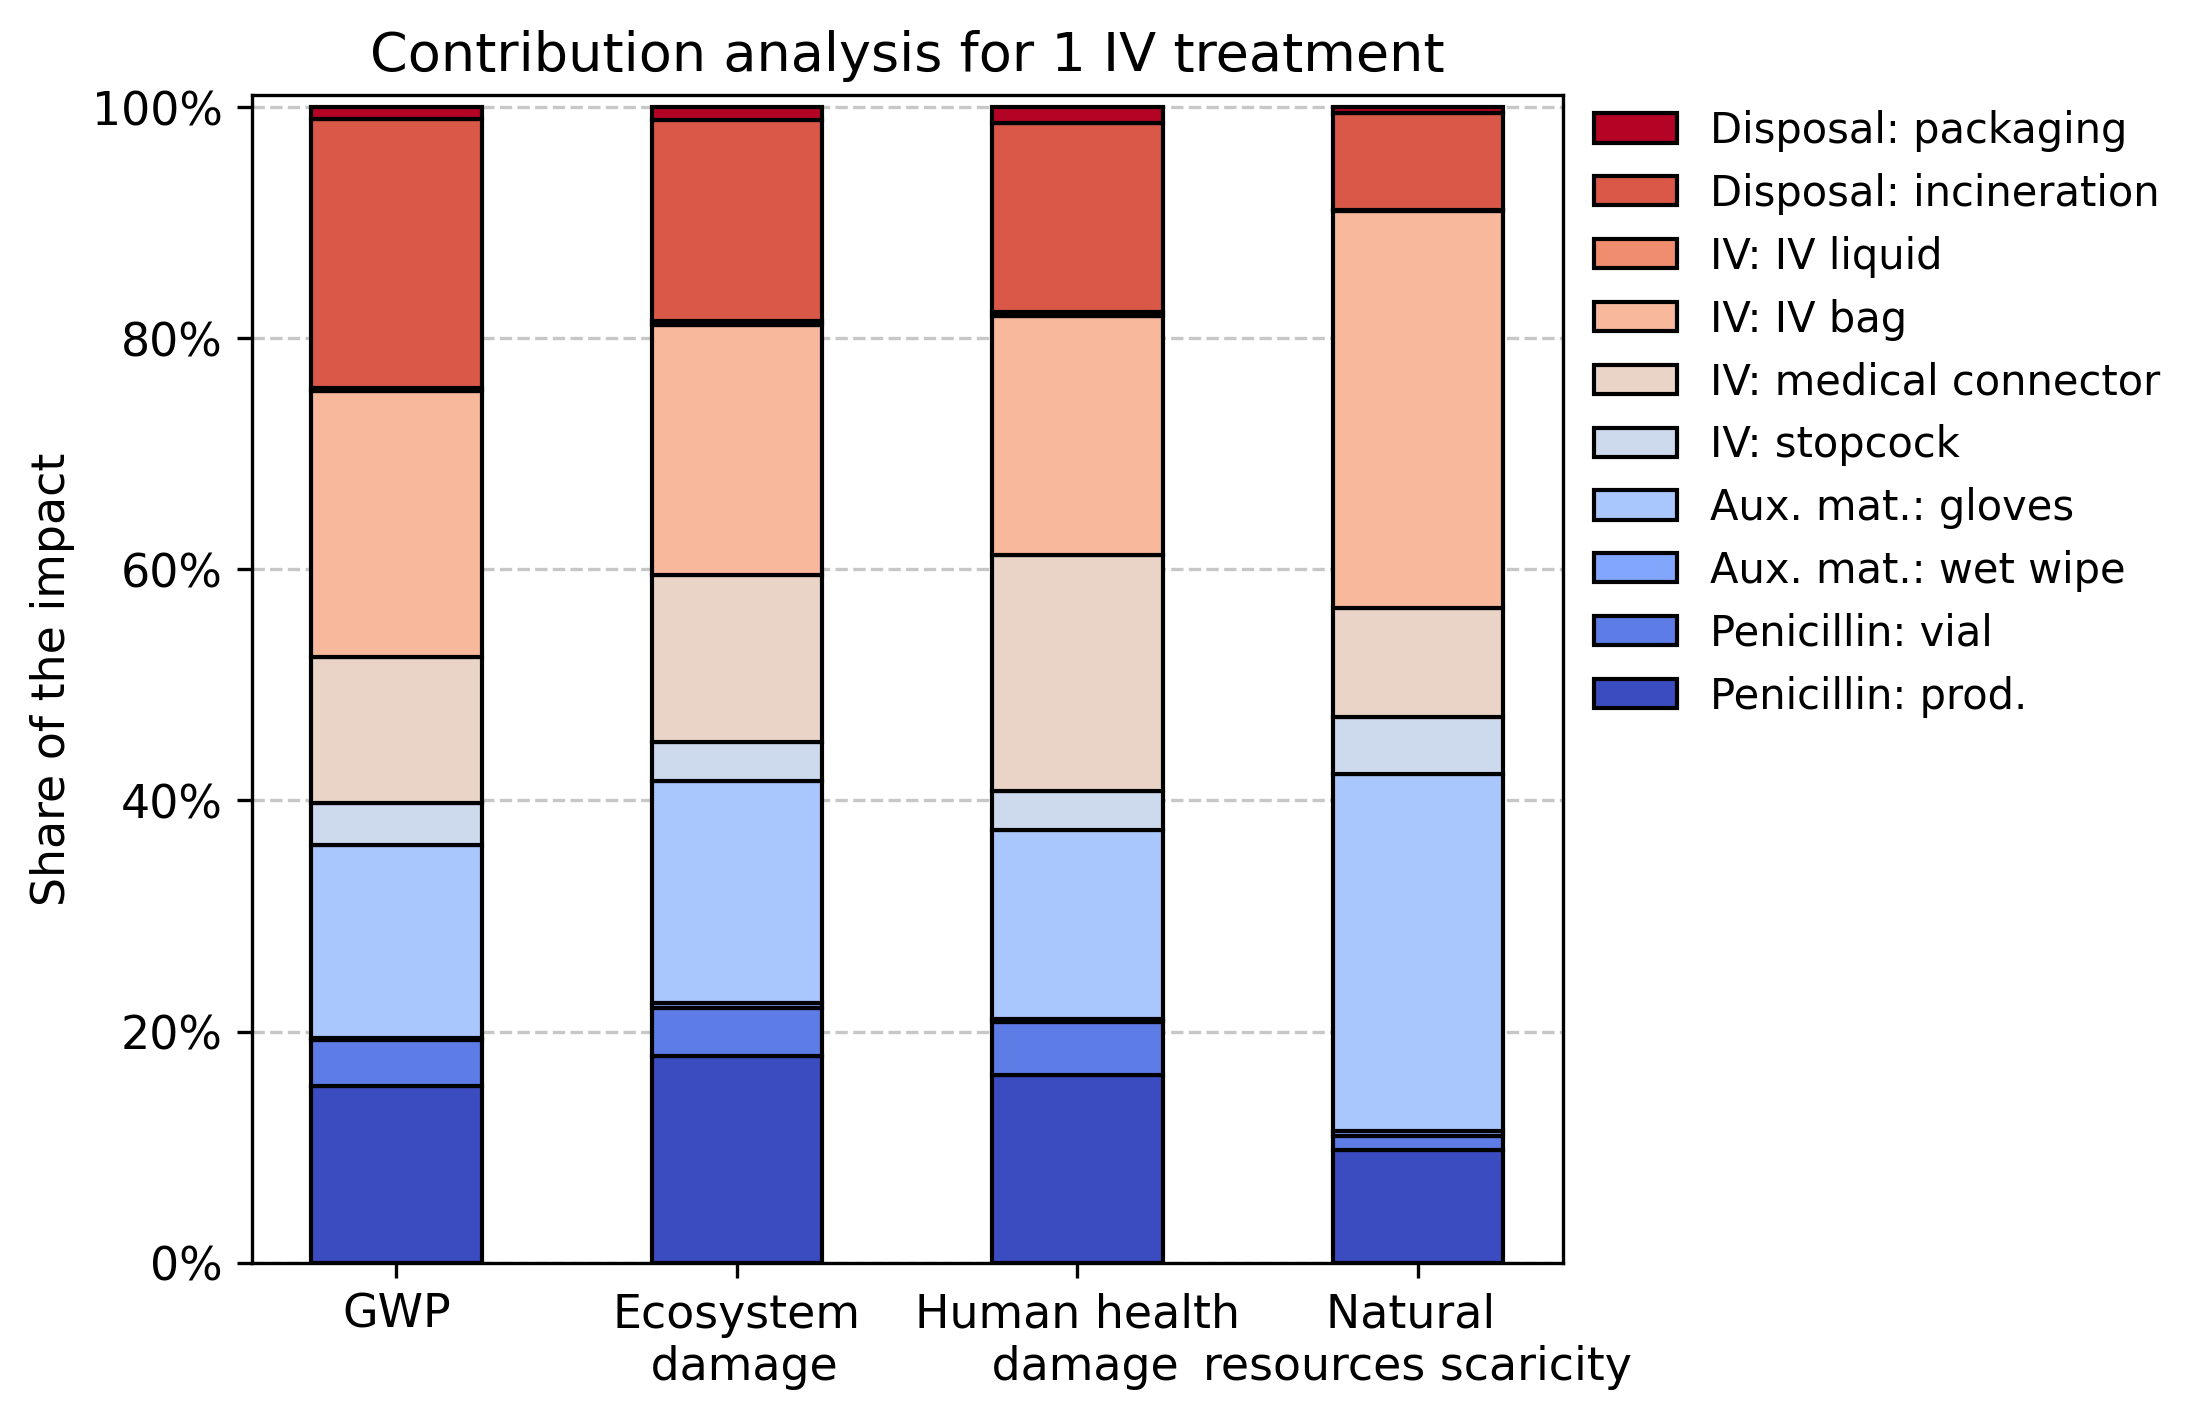

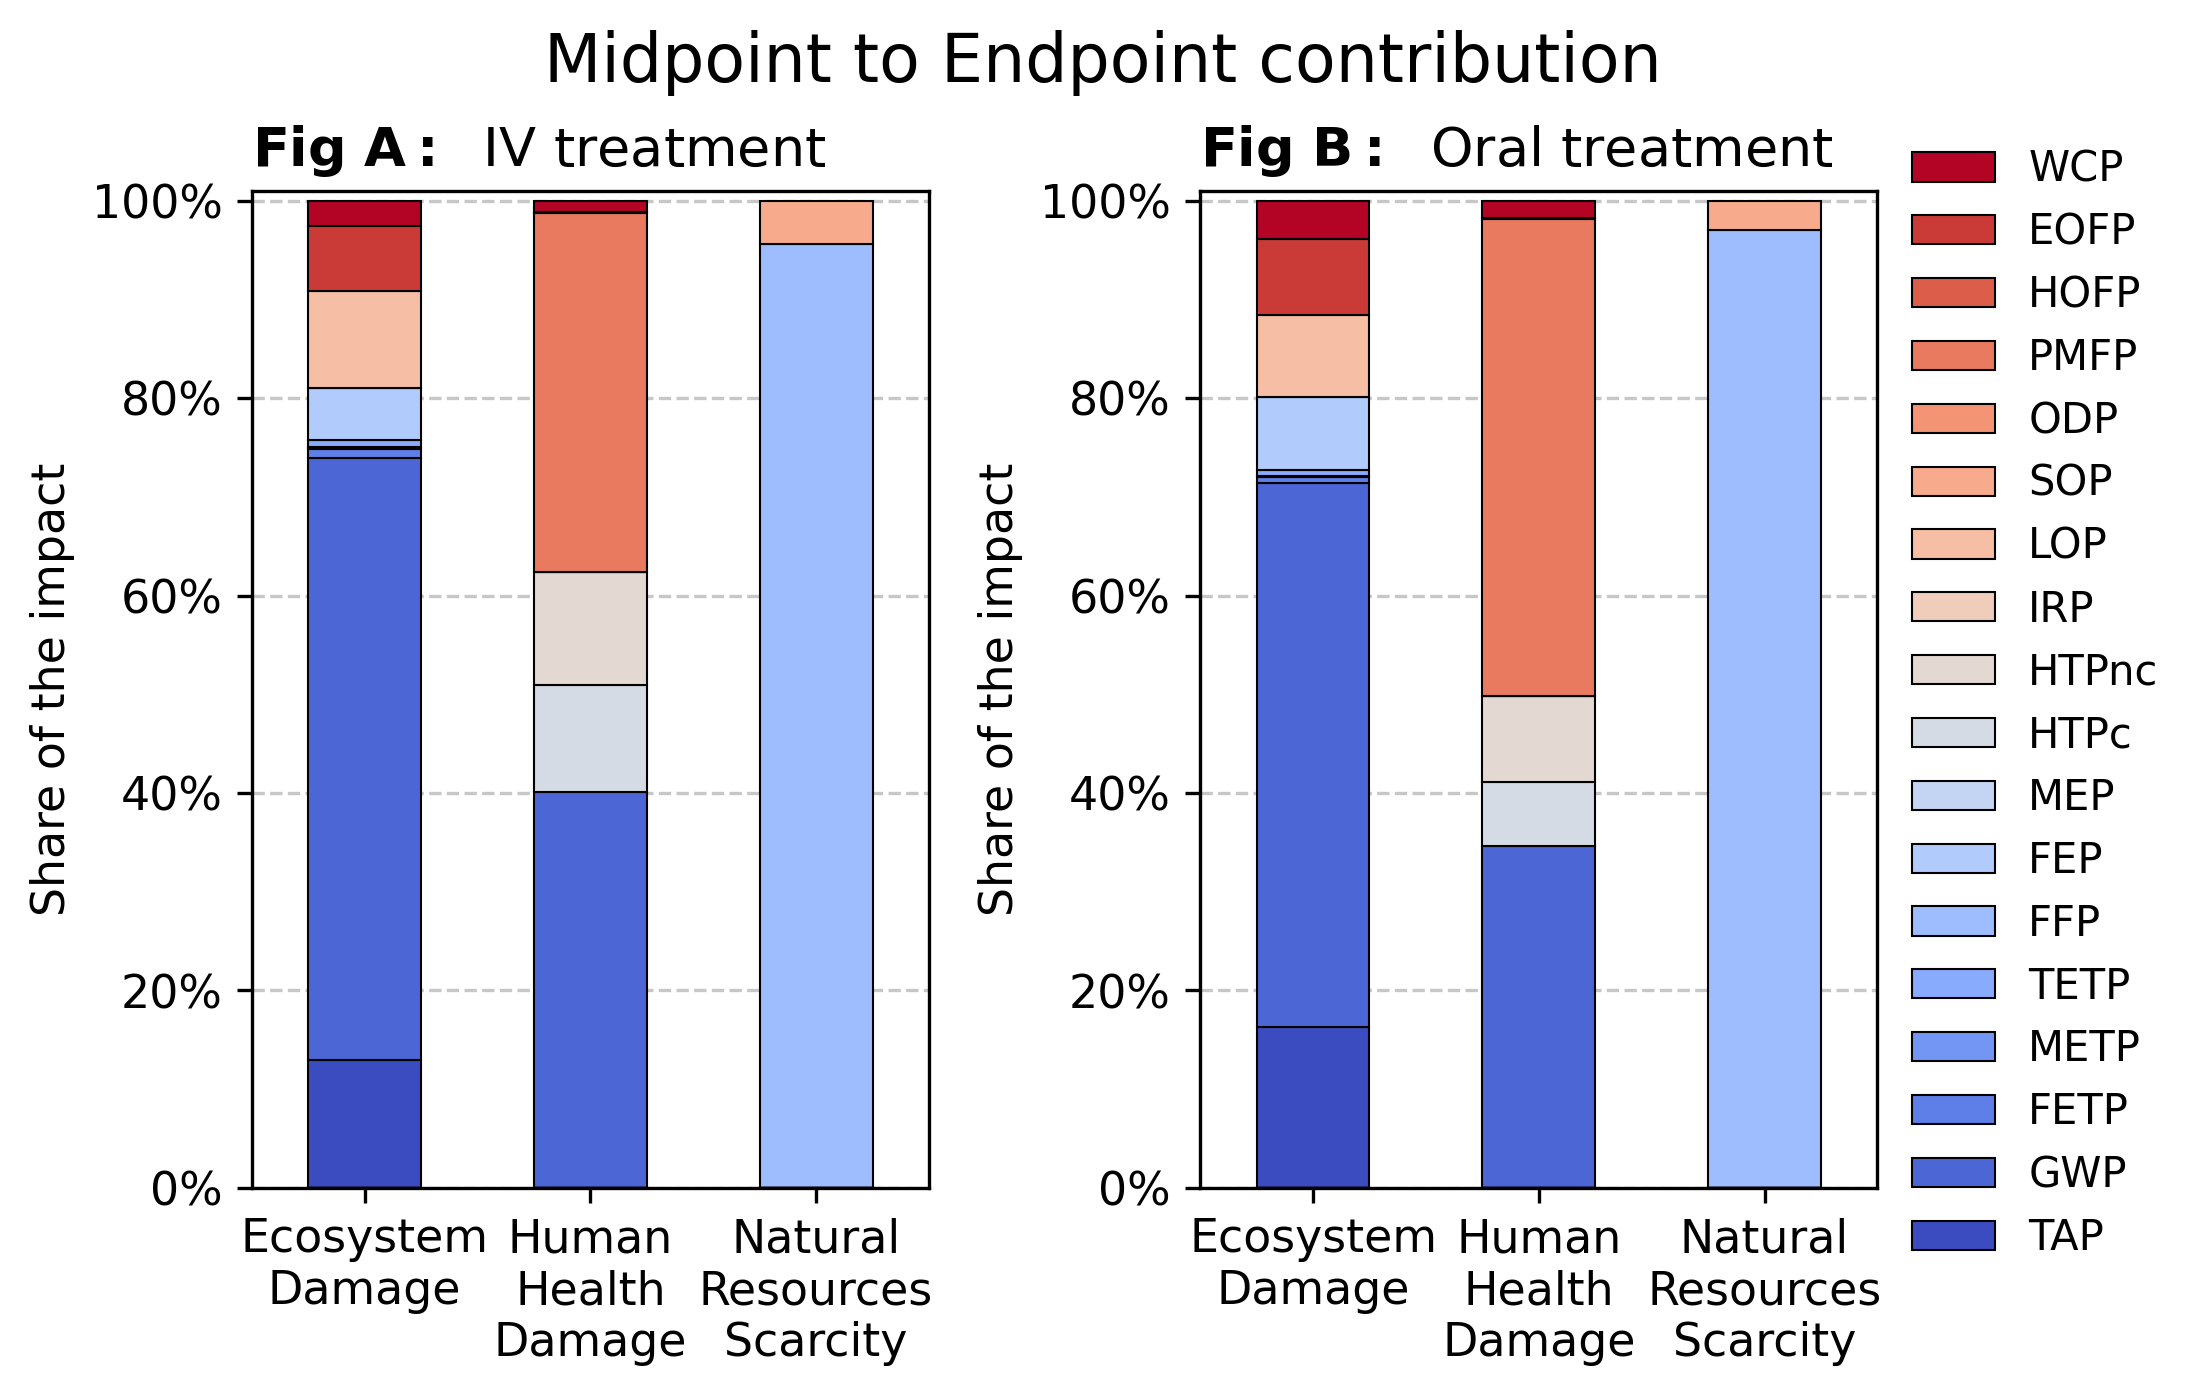

Min reduction : 89.52%
Max reduction : 62.05%


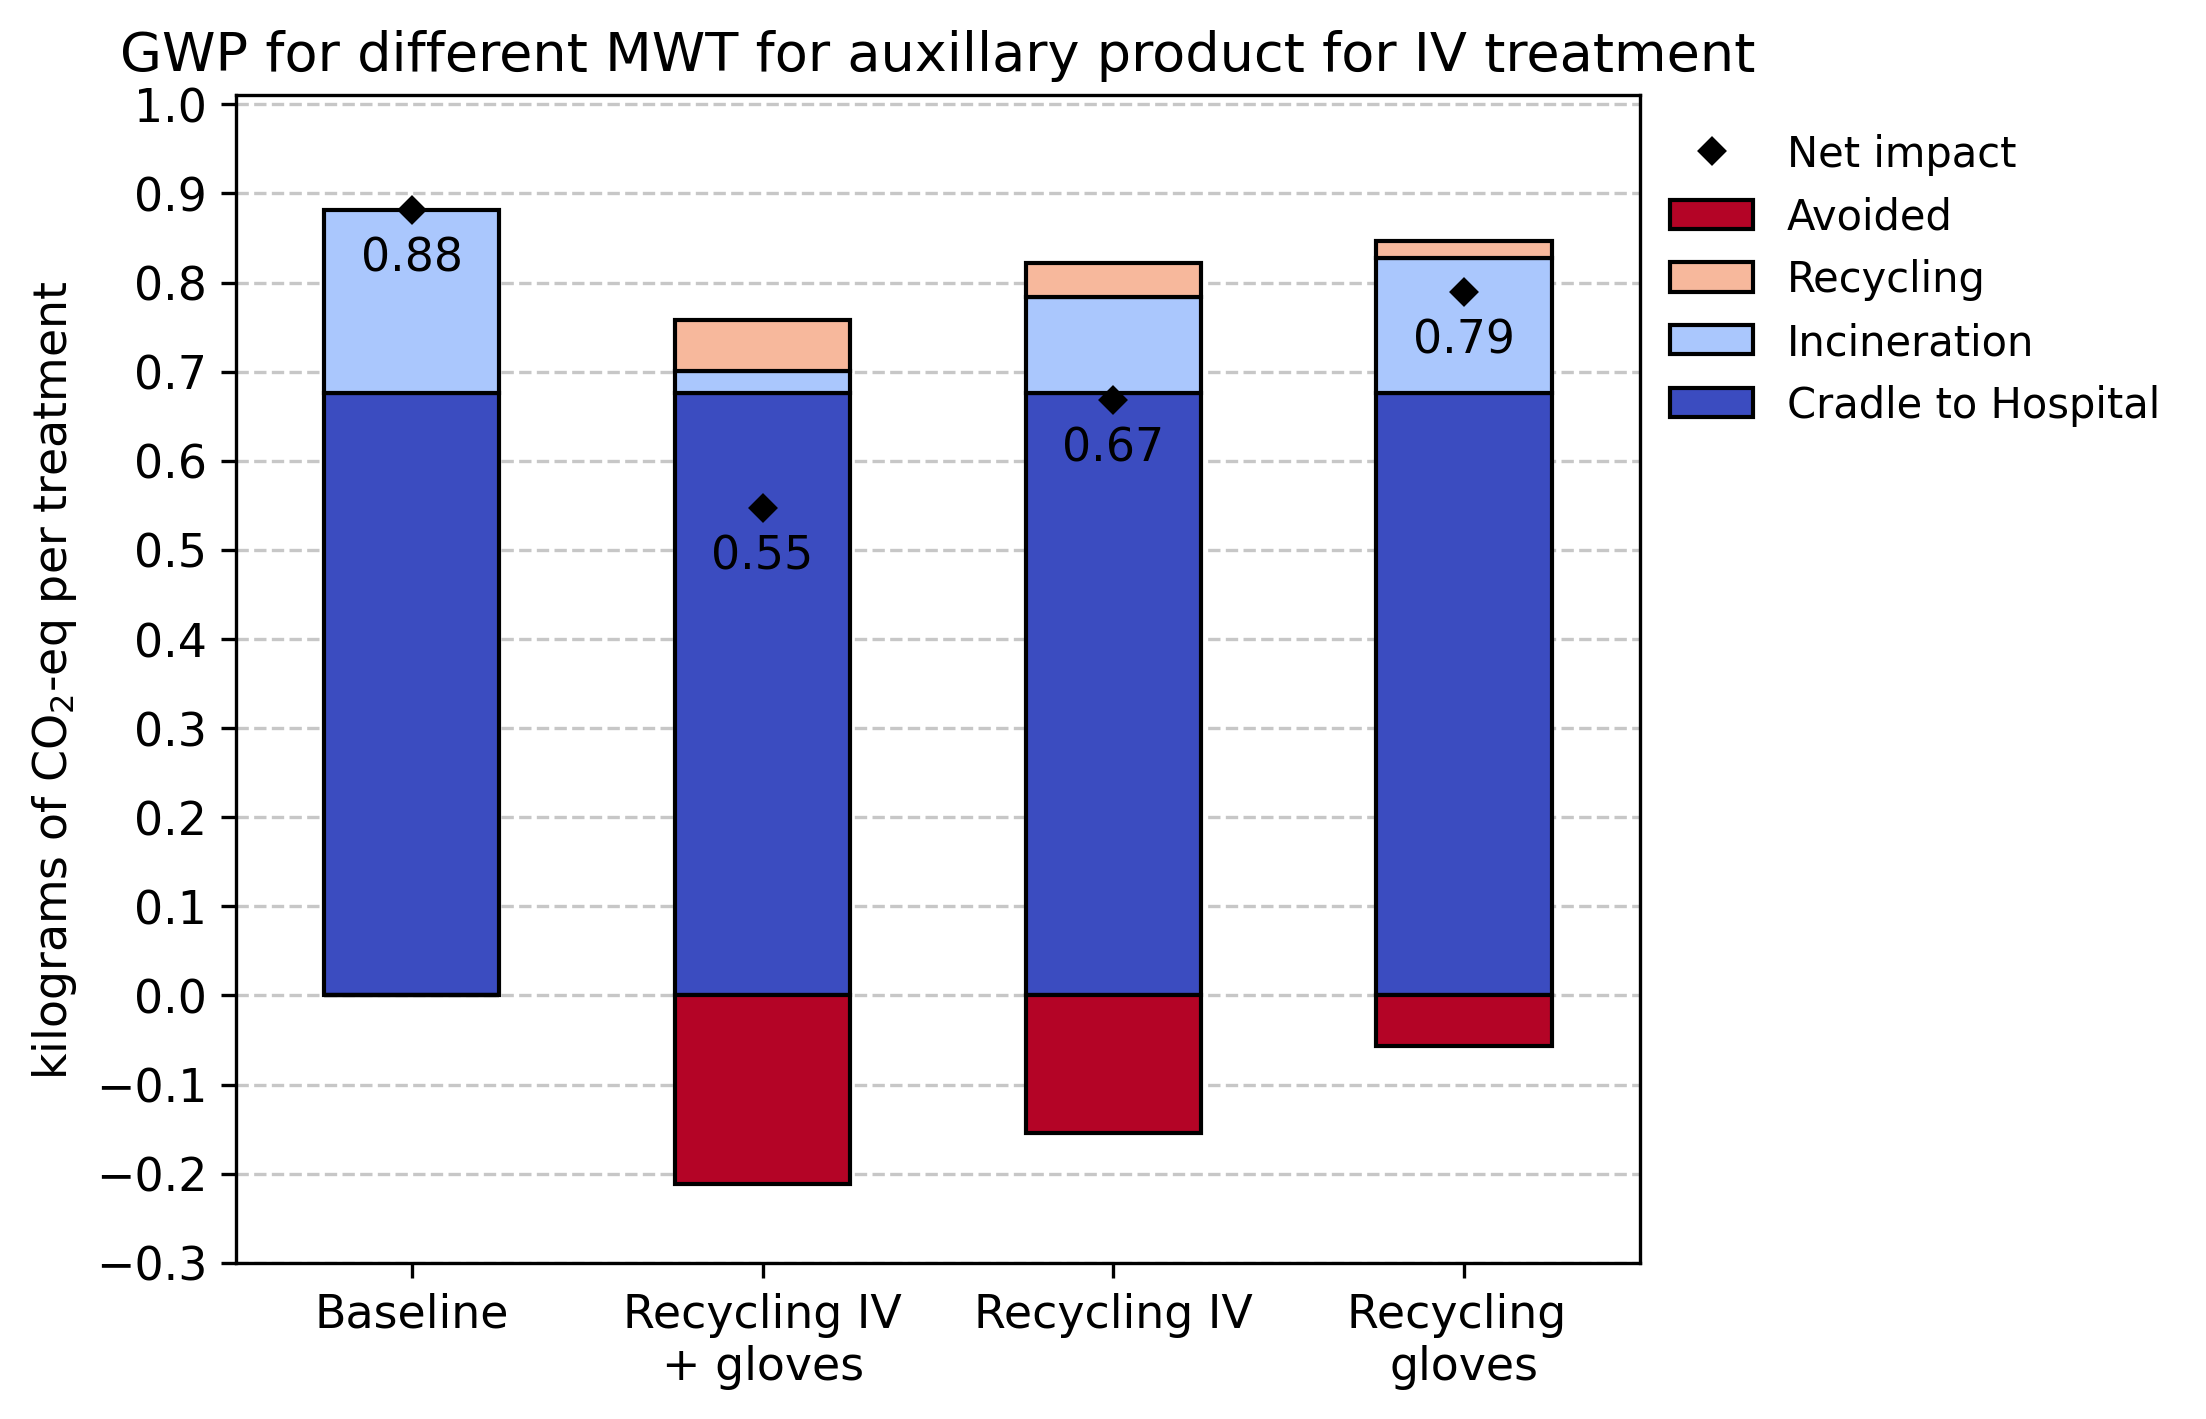

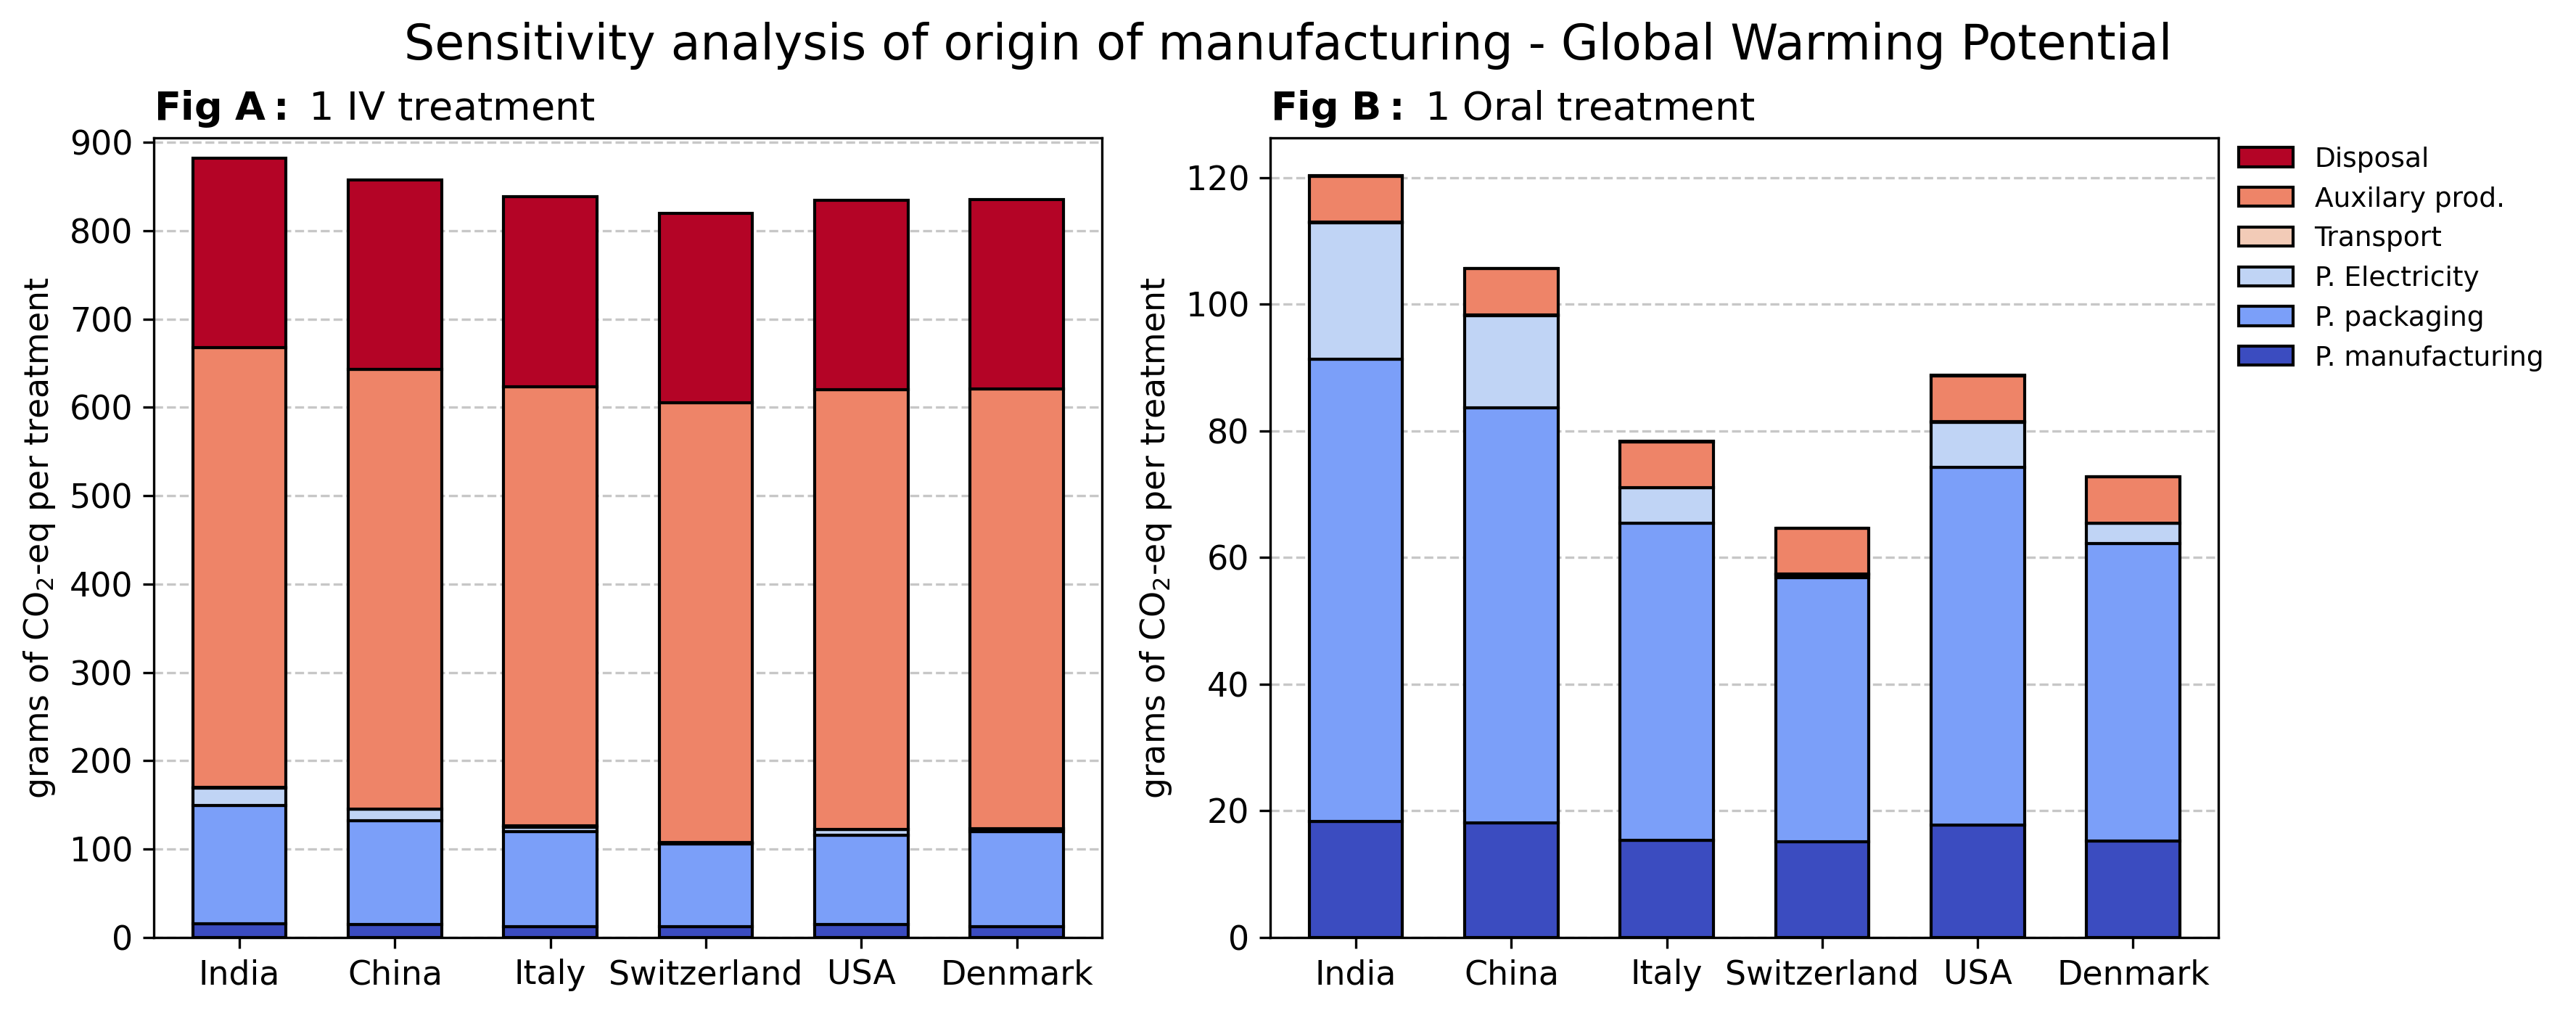

Extracted 1 worksheets in 0.05 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 3.42 seconds
Matching database: ev391cutoff
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:


33 datasets
275 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\ruw\AppData\Local\pylca\Brightway3\Penicillin.7179b081106185b3e43fbe3ebfd7f229\output\db-matching-penicillin_cut_off_IN-unlinked.xlsx


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 10/07/2025 10:15:32
  Finished: 10/07/2025 10:15:32
  Total time elapsed: 00:00:00
  CPU %: 50.40
  Memory %: 3.23
Created database: penicillin_cut_off_IN
30.85834725129892
32.35125174301644


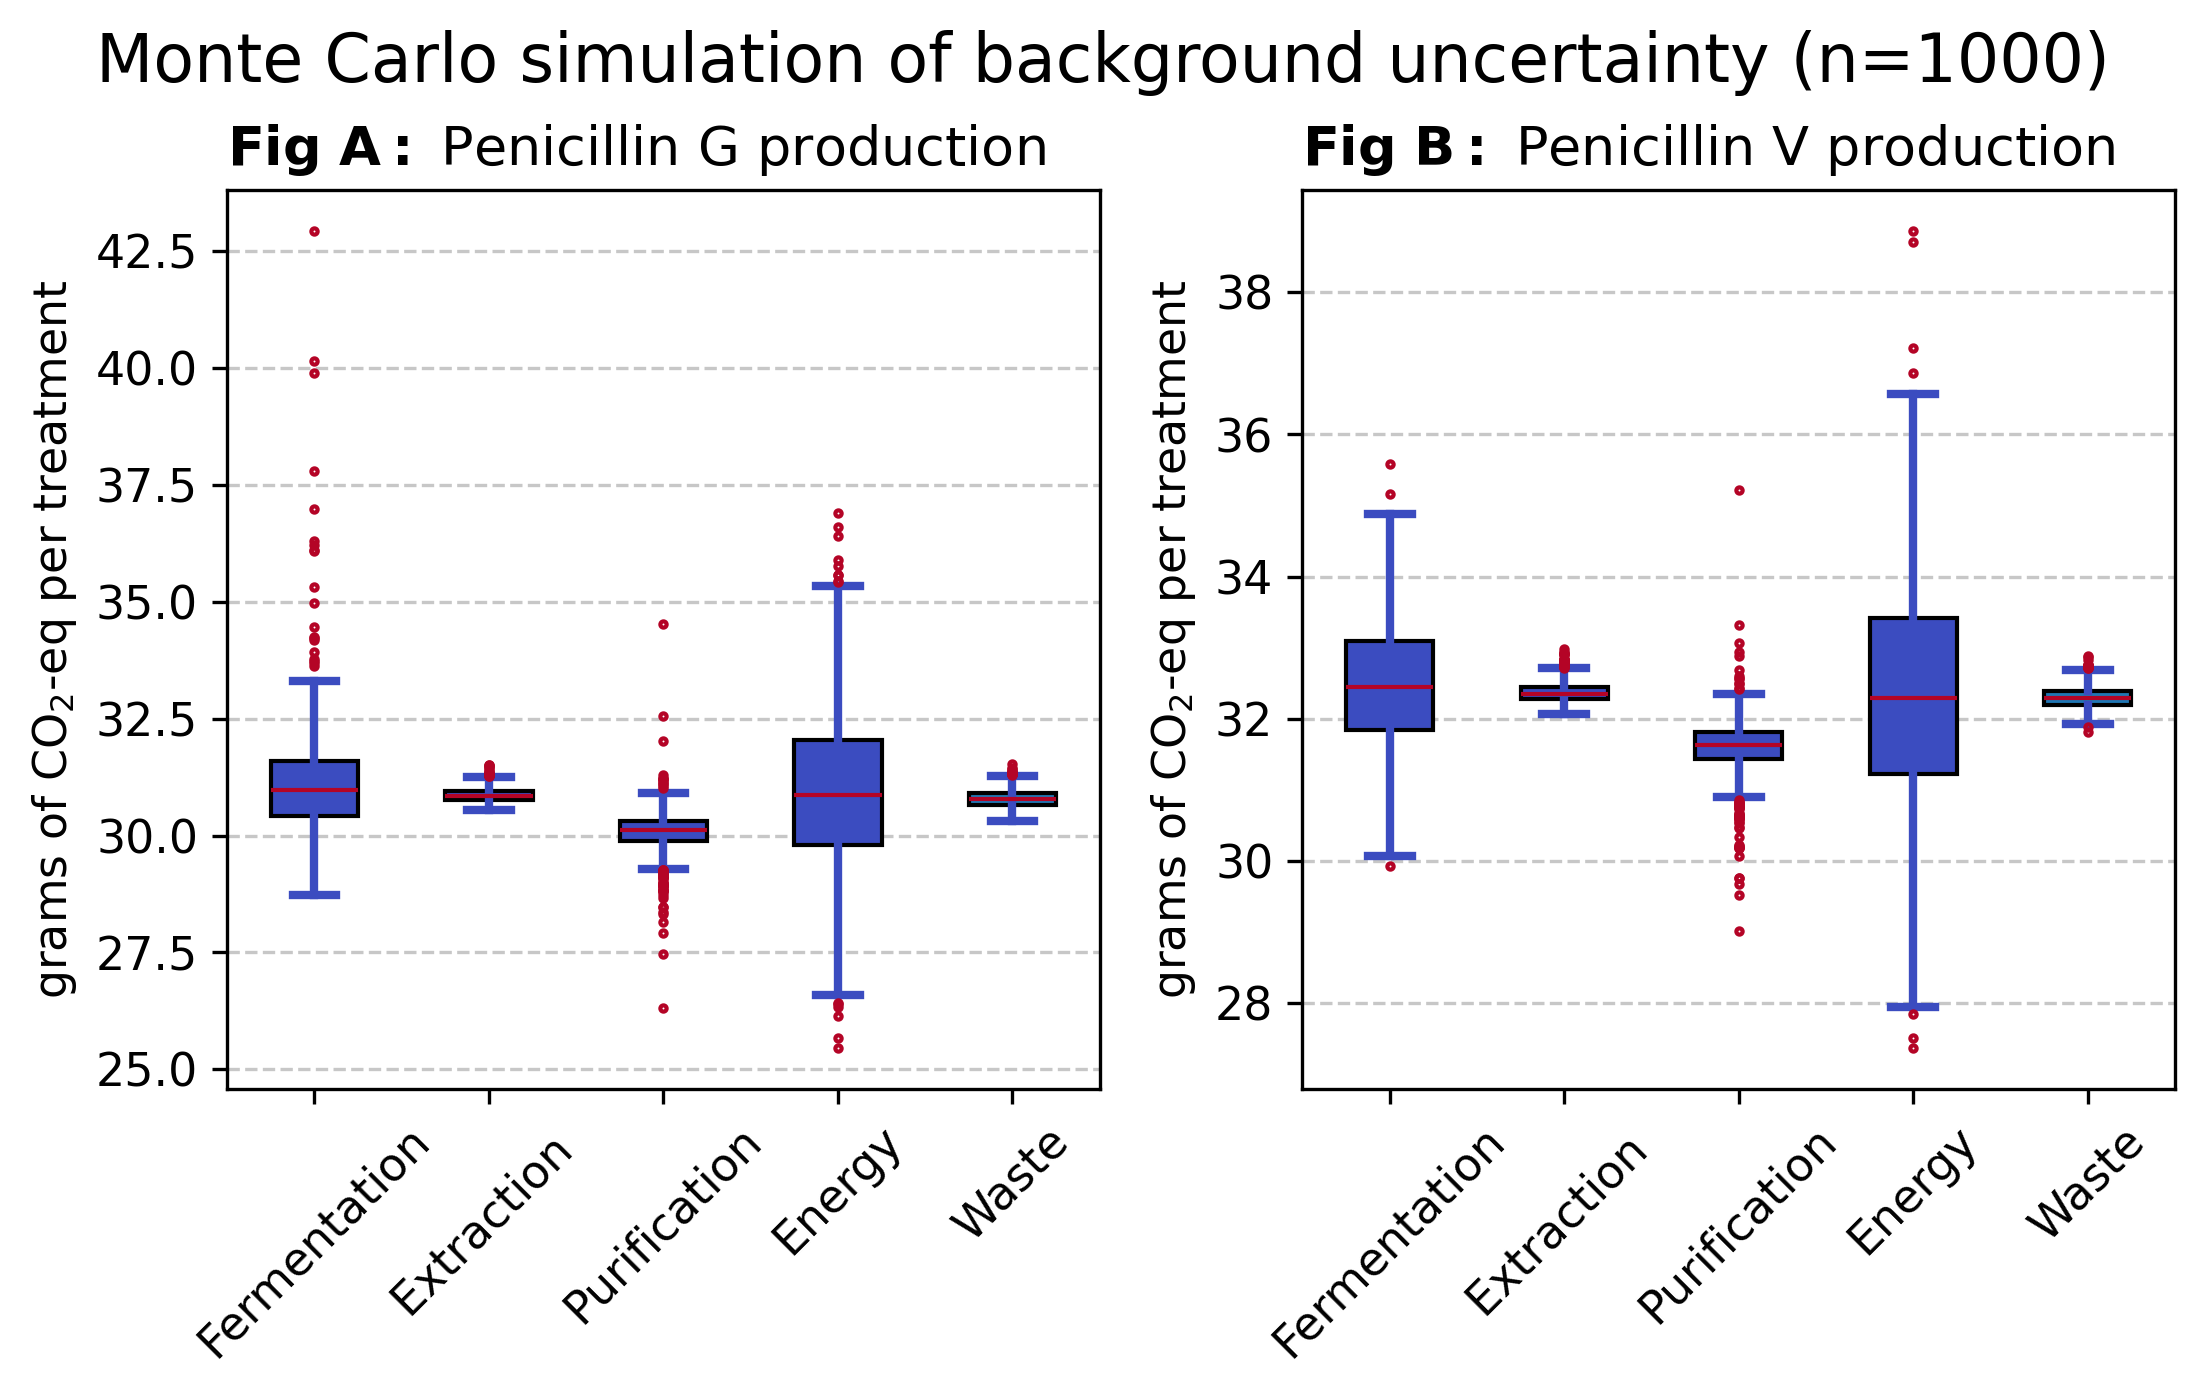

Oral saves 94.0%
Combined saves 56.0%


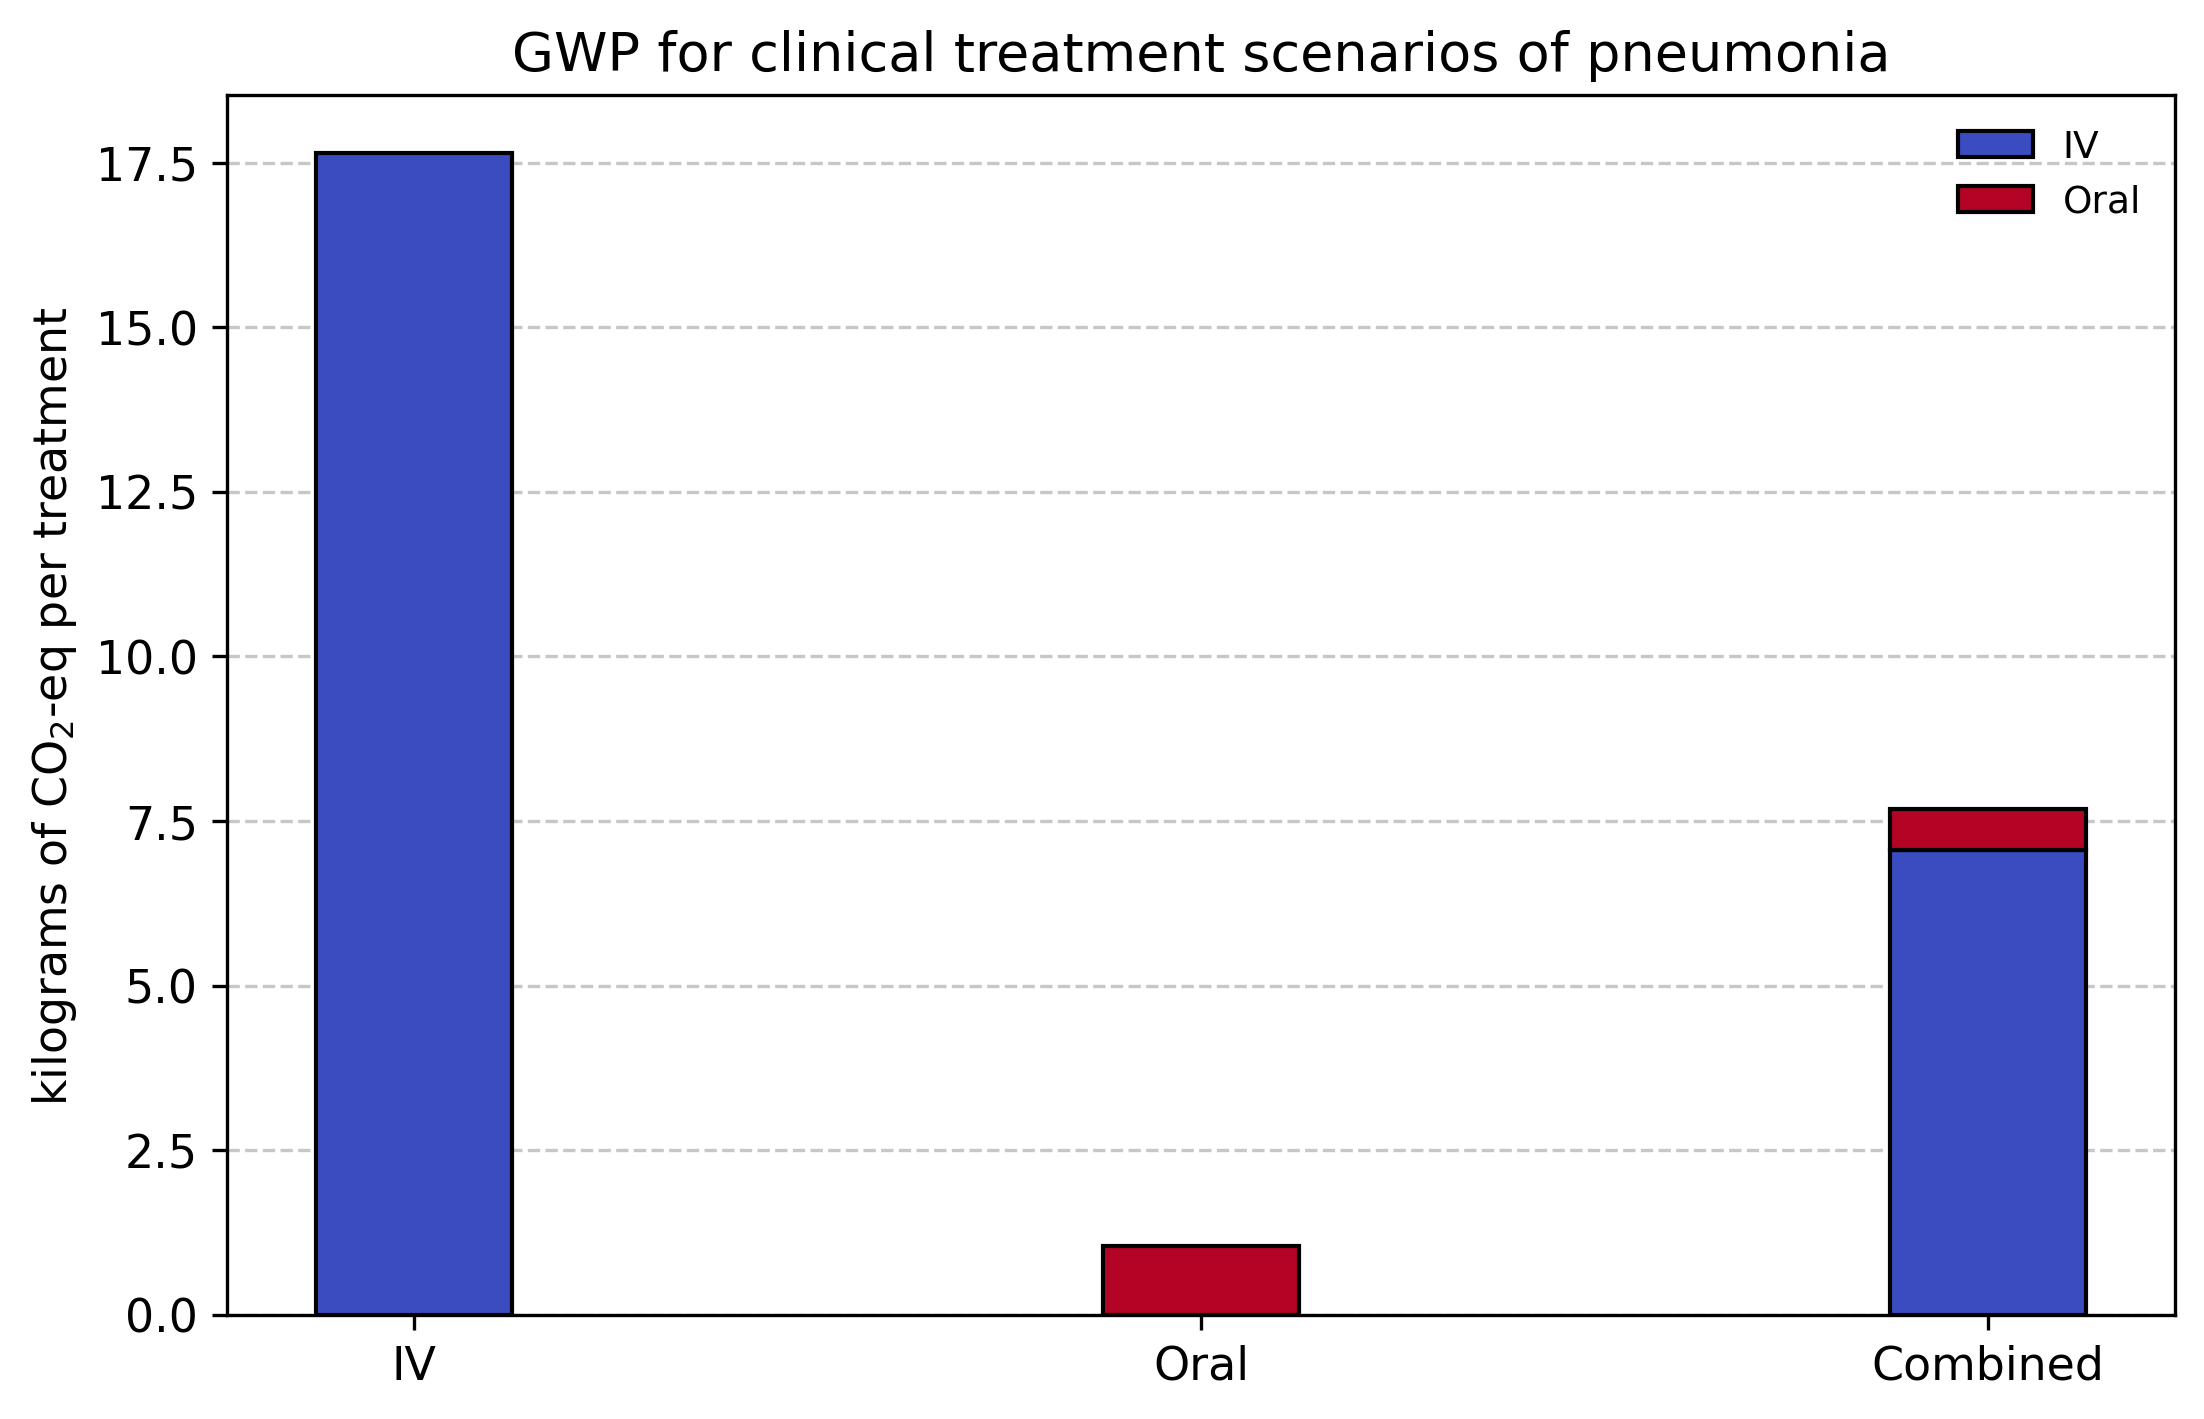

In [181]:
reload_lib([m, rfig, stc, mce, mte, st])

calc = False
reload = False
sensitivty = False


rfig.create_results_figures(calc=calc, reload=reload) # Calculating the results and creating the figures
st.perform_sens_uncert_analysis(samples=1000, reload=reload, calc=calc, sensitivty=sensitivty)
# if calc:
#     init = m.main()
#     dct = init.create_LCI_tables()
